In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(r'D:\data analysis\Datasets\KaggleV2-May-2016.csv\medical_appointments.csv')

In [8]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df.shape

(110527, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


all the features included have no null values

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can see that age column has minimum value of -1 which is not possible so we need to exclude this row

check for the duplicate values

In [12]:
df.duplicated().sum()

0

In [14]:
df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [17]:
df.drop(index = 99832 , axis = 0, inplace = True)

converting columns in to date time for easy calculation

In [18]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

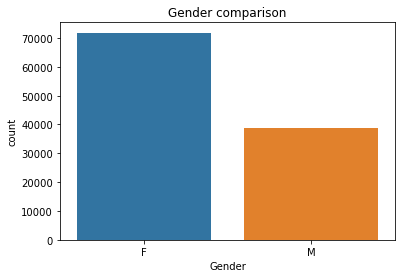

In [62]:
plt.figure(figsize=(6,4))
sns.countplot(df['Gender'])
plt.title('Gender comparison')
plt.show()

More number of females are present as compared to the males

In [52]:
df['Appointment_date'] = pd.to_datetime(df['AppointmentDay']).dt.date

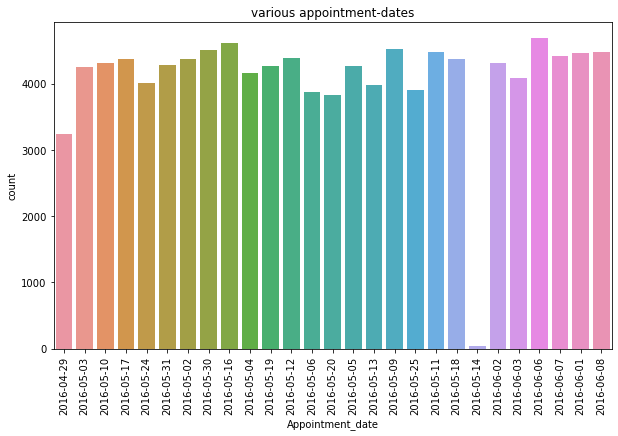

In [55]:
plt.figure(figsize = (10,6))
sns.countplot(df['Appointment_date'])
plt.title('various appointment-dates')
plt.xticks(rotation = 90)
plt.show()

we have 27 unique dates, we can see that least appointments on 14 May 2016 and max appointments were on 06 June 2016

In [58]:
df['Appointment_dayof_week'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()

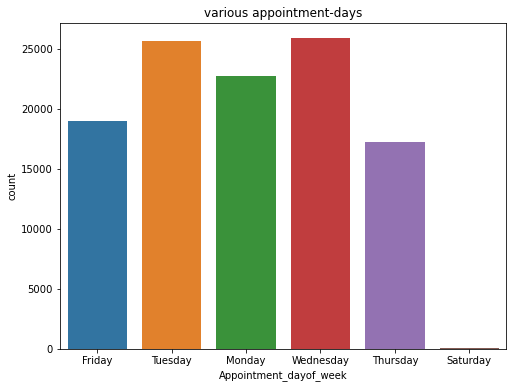

In [61]:
plt.figure(figsize = (8,6))
sns.countplot(df['Appointment_dayof_week'])
plt.title('various appointment-days')
plt.show()

More appointments were on wednesday and least were on saturdays

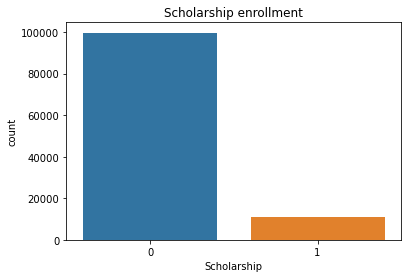

In [64]:
plt.figure(figsize = (6,4))
sns.countplot(df['Scholarship'])
plt.title('Scholarship enrollment')
plt.show()

Very few people have enrolled in scholarship program

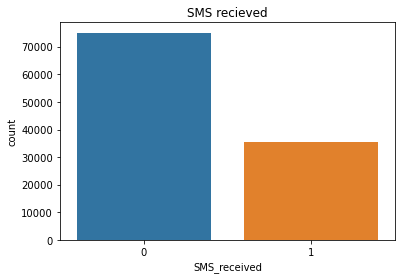

In [65]:
plt.figure(figsize = (6,4))
sns.countplot(df['SMS_received'])
plt.title('SMS recieved')
plt.show()

Also the people that received SMS was less

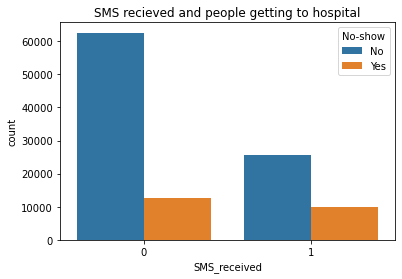

In [69]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'SMS_received', hue = 'No-show', data = df)
plt.title('SMS recieved and people getting to hospital')
plt.show()

we can see that the number of people who did not get the sms but showed up is high as compared to the people who got the sms.
So we can conclude that the SMS has really not help much in bringing patients to the hospital

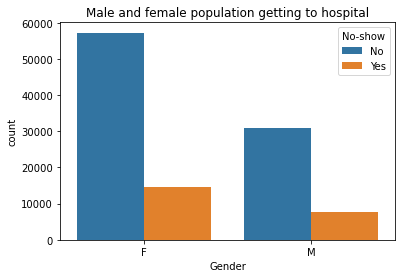

In [72]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Gender', hue = 'No-show', data = df)
plt.title('Male and female population getting to hospital')
plt.show()

Need to check the percentage of either gender getting to the hospital, so it will be easy to make the comparison

In [75]:
df.groupby('Gender')['No-show'].value_counts(normalize = True)*100

Gender  No-show
F       No         79.685129
        Yes        20.314871
M       No         80.032052
        Yes        19.967948
Name: No-show, dtype: float64

this shows that nearly 80% of females and males showed up to the hospital as per their appointment 

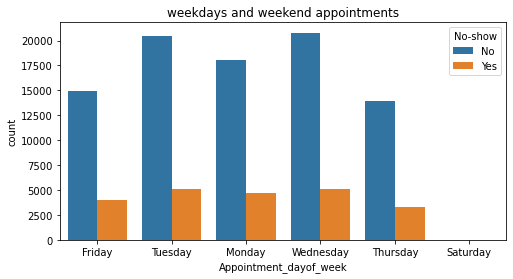

In [77]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'Appointment_dayof_week', hue = 'No-show', data = df)
plt.title('weekdays and weekend appointments')
plt.show()

It can be clearly seen that the patients that had appointment during weekdays showed up more as compared to them on weekends

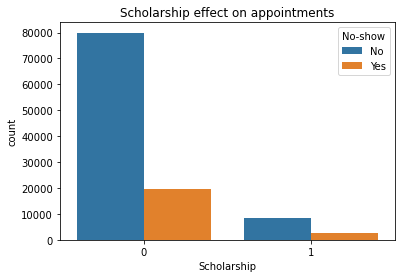

In [80]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Scholarship', hue = 'No-show', data = df)
plt.title('Scholarship effect on appointments')
plt.show()

Scholarship had really no more core impact on the patients turning up to the hospitals